In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as s
from numpy.polynomial.polynomial import Polynomial
import seaborn as sns
import numpy.polynomial.polynomial as poly
import warnings

In [2]:
#Importar Lineas Nuevas
file_name = 'tabla_resultados_segunda_lista.xlsx'

df = pd.read_excel(file_name, skiprows=0, usecols=[1], names=['lambda'])
#df['lambda'] = df['lambda'].str.replace(' ', '', regex=False)

lambda_array = df["lambda"].to_numpy()

df

,lambda
0,405.618147
1,405.990635
2,406.086451
3,406.359445
4,406.773517
...,...
935,1047.253784
936,1053.513331
937,1055.854272
938,1058.004662


In [3]:
#Importar Espectro Completo
file_name = 'vizier_votable_VIS_1000nm.tsv'

df2 = pd.read_csv(file_name, delimiter=";", names=["Wave", "nFlux", "rFlux"])

df2 = df2.astype(float)

wave_array = df2["Wave"].to_numpy()
nflux_array = df2["nFlux"].to_numpy()
rflux_array = df2["rFlux"].to_numpy()

df2

,Wave,nFlux,rFlux
0,9395.413304,0.999901,0.013563
1,9395.417071,0.999785,0.013550
2,9395.420837,1.000163,0.013528
3,9395.424604,1.000545,0.013473
4,9395.428370,1.000578,0.013401
...,...,...,...
4057457,9395.394472,1.000422,0.013813
4057458,9395.398238,0.999422,0.013766
4057459,9395.402005,0.998765,0.013700
4057460,9395.405771,0.999597,0.013645


In [4]:
#Convertir Valores del Espactro a Nanometros
wavelenght_array = (10**(7))/wave_array
df2["Wave"] = wavelenght_array

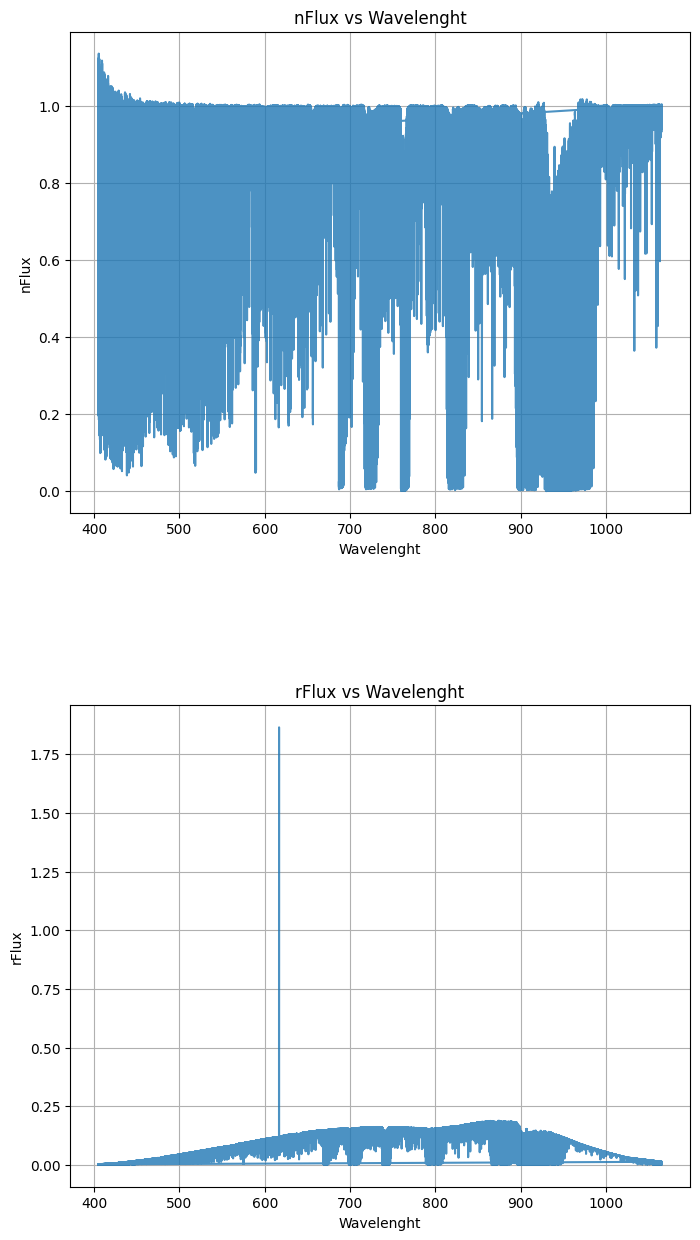

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(8, 15))
plt.subplots_adjust(hspace=0.4)

columns2 = ["nFlux", "rFlux"]
titles2 = ["nFlux", "rFlux"]

for i, col in enumerate(columns2):
    axes[i].plot(df2["Wave"], df2[col], linestyle='-', marker='', alpha=0.8)
    axes[i].set_xlabel("Wavelenght")
    axes[i].set_ylabel(col)
    axes[i].set_title(f"{titles2[i]} vs Wavelenght")
    axes[i].grid(True) 

plt.show()

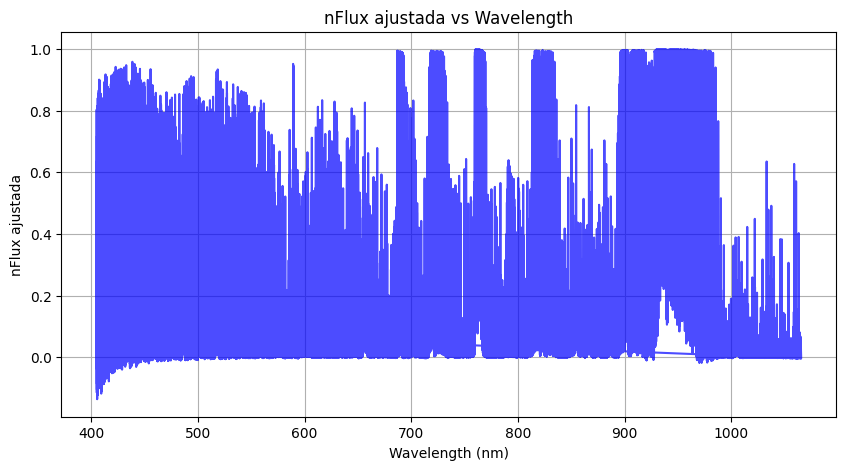

In [6]:
#Invertir Espectro
df2["nFlux_ajustada"] = 1 - df2["nFlux"]

plt.figure(figsize=(10, 5))
plt.plot(df2["Wave"], df2["nFlux_ajustada"], color='blue', alpha=0.7)

plt.xlabel("Wavelength (nm)")
plt.ylabel("nFlux ajustada")
plt.title("nFlux ajustada vs Wavelength")
plt.grid(True)

plt.show()

In [7]:
#Encontrar Indices de dos Valores de Lambda
arriba = np.abs(df2["Wave"] - 1000).argmin()
abajo = np.abs(df2["Wave"] - 1000.15).argmin()
print(abajo, arriba)

160117 160515


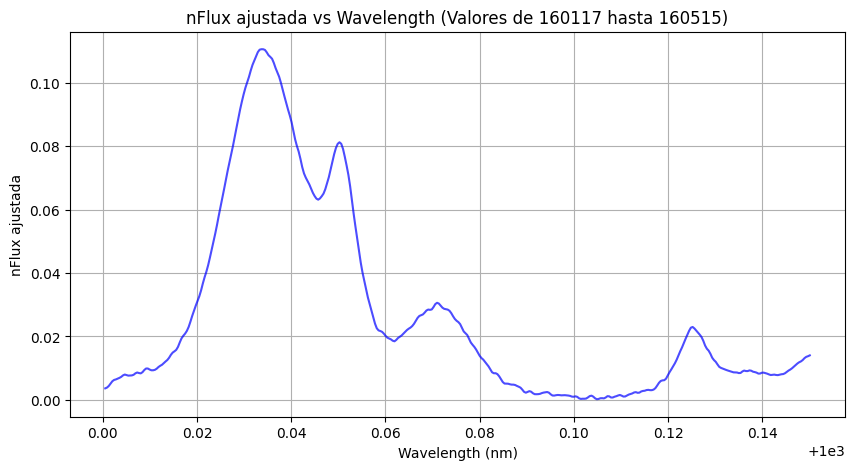

In [8]:
#Graficar Entre los Valores Seleccionados
df2["nFlux_ajustada"] = 1 - df2["nFlux"]

plt.figure(figsize=(10, 5))
plt.plot(df2["Wave"][abajo:arriba], df2["nFlux_ajustada"][abajo:arriba], color='blue', alpha=0.7)

plt.xlabel("Wavelength (nm)")
plt.ylabel("nFlux ajustada")
plt.title(f"nFlux ajustada vs Wavelength (Valores de {abajo} hasta {arriba})")
plt.grid(True)

plt.show()

In [9]:
#Cuadrar lineas de absorcion con valores en el espectro completo
df["lambda"] = lambda_array

lambda_filtradas = df["lambda"][df["lambda"] >= df2["Wave"].min()]

def encontrar_mas_cercano(valor, array):
    idx = (np.abs(array - valor)).argmin()
    return array[idx]

valores_mas_cercanos = [encontrar_mas_cercano(i, df2["Wave"].values) for i in lambda_filtradas]

flux_mas_cercanos = [df2.loc[df2["Wave"] == i, "nFlux_ajustada"].values[0] for i in valores_mas_cercanos]

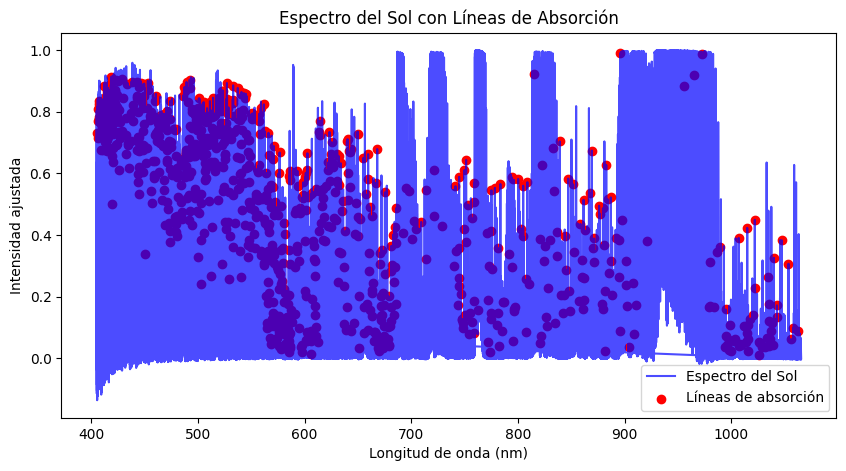

In [10]:
#Graficar Lineas de Absorcion en el Espectro
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)
    plt.figure(figsize=(10,5))
    plt.plot(df2["Wave"], df2["nFlux_ajustada"], label="Espectro del Sol", color="blue", alpha = 0.7)
    plt.scatter(valores_mas_cercanos, flux_mas_cercanos, color='red', label="Líneas de absorción")
    plt.xlabel("Longitud de onda (nm)")
    plt.ylabel("Intensidad ajustada")
    plt.legend()
    plt.title("Espectro del Sol con Líneas de Absorción")
    plt.show()

In [11]:
#Imprimir la cantidad de Lineas Mapeadas
print(f"Cantidad de lineas mapeadas: {len(valores_mas_cercanos)}")
print(f'Longitud de archivo de lineas: {len(lambda_array)}')

Cantidad de lineas mapeadas: 940
Longitud de archivo de lineas: 940


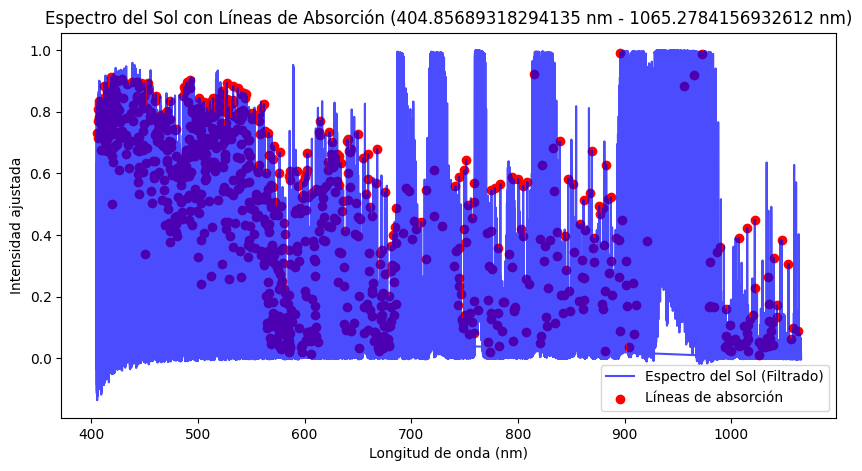

In [12]:
#Filtrar Espectro en Caso de Quererse un Rango Especifico
maximo = max(df2["Wave"])
minimo = min(df2["Wave"])
lambda_min = minimo #405.17 #600 #405.15
lambda_max = maximo #405.195 #601.1 #405.2

df2_filtrado = df2[(df2["Wave"] >= lambda_min) & (df2["Wave"] <= lambda_max)]

valores_mas_cercanos_filtrados = [val for val in valores_mas_cercanos if lambda_min <= val <= lambda_max]
flux_mas_cercanos_filtrados = [df2.loc[df2["Wave"] == val, "nFlux_ajustada"].values[0] for val in valores_mas_cercanos_filtrados]
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)
    plt.figure(figsize=(10,5))
    plt.plot(df2_filtrado["Wave"], df2_filtrado["nFlux_ajustada"], label="Espectro del Sol (Filtrado)", color="blue", alpha=0.7)
    plt.scatter(valores_mas_cercanos_filtrados, flux_mas_cercanos_filtrados, color='red', label="Líneas de absorción")
    plt.xlabel("Longitud de onda (nm)")
    plt.ylabel("Intensidad ajustada")
    plt.legend()
    plt.title(f"Espectro del Sol con Líneas de Absorción ({lambda_min} nm - {lambda_max} nm)")
    plt.show()

In [13]:
#Configurar Cotas Laterales para los Ajustes
limit_miliarmstrong = 22
limit_nm = limit_miliarmstrong * 10**(-4)

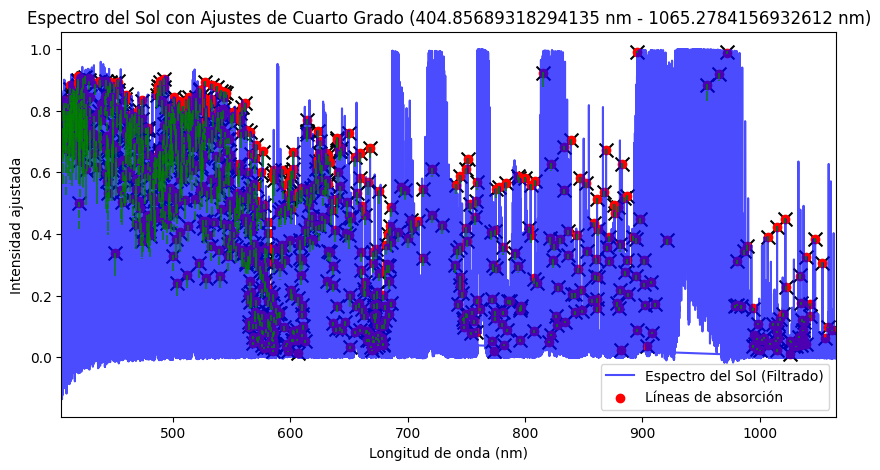

In [14]:
#Iterar el Espectro Y Hacer el Ajuste en Todas las Lineas Detectadas
puntos_a_lados = 60

#Funcion para Evaluar Tercera Derivadas
def operacion_tercera_deriv(seg, ter):
    return -((ter)/(3*(seg**2)))

plt.figure(figsize=(10, 5))
plt.plot(df2_filtrado["Wave"], df2_filtrado["nFlux_ajustada"], label="Espectro del Sol (Filtrado)", color="blue", alpha=0.7)

# Ajuste
c = 0
lambda_obs = []
flux_lista = []
non_real_indices = []
evaluacion_segunda_deriv = []
evaluacion_tercera_deriv = []

for index, centro in enumerate(valores_mas_cercanos_filtrados):
    idx_centro = df2.index[df2["Wave"] == centro][0]
    idx_derecha = (df2["Wave"] - (centro - limit_nm)).abs().idxmin()
    idx_izquierda = (df2["Wave"] - (centro + limit_nm)).abs().idxmin()
    #print(idx_izquierda, idx_derecha)

    #Seleccionar puntos
    idx_min = idx_izquierda
    idx_max = idx_derecha

    '''idx_min = max(0, idx_centro - puntos_a_lados)
    idx_max = min(len(df2) - 1, idx_centro + puntos_a_lados)'''

    wave_segment = df2["Wave"].iloc[idx_min:idx_max].values
    #print(wave_segment)
    flux_segment = df2["nFlux_ajustada"].iloc[idx_min:idx_max].values

    #Ajuste
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', np.polynomial.polyutils.RankWarning)
        coefs = poly.polyfit(wave_segment, flux_segment, 4)

    #Derivar
    d_coefs = poly.polyder(coefs)
    segunda_derivada = poly.polyder(d_coefs)
    tercera_derivada = poly.polyder(segunda_derivada)

    critical_points = poly.polyroots(d_coefs)  #Raices de la deriv.
    
    if lambda_min == minimo and lambda_max == maximo:
        valid_critical_points = critical_points
    else:
        valid_critical_points = [x for x in critical_points if wave_segment.min() <= x <= wave_segment.max()]
    
    '''valid_critical_points = [x for x in critical_points if wave_segment.min() <= x <= wave_segment.max()]'''

    valid_critical_points = [x.real for x in critical_points if x.imag == 0 and wave_segment.min() <= x.real <= wave_segment.max()]

    if not valid_critical_points:
        non_real_indices.append(index)
    #print(critical_points)

    #raise KeyboardInterrupt

    if valid_critical_points:
        flux_criticos = poly.polyval(valid_critical_points, coefs)

        #Encontrar maximo
        max_idx = np.argmax(flux_criticos)
        max_wave = valid_critical_points[max_idx]
        max_flux = flux_criticos[max_idx]

        lambda_obs.append(max_wave)
        flux_lista.append(max_flux)

        #Evaluar Derivadas en Lambda Observado
        segunda_deriv_evaluada = poly.polyval(max_wave, segunda_derivada)
        tercera_deriv_evaluada = poly.polyval(max_wave, tercera_derivada)

        evaluacion_segunda_deriv.append(segunda_deriv_evaluada)
        evaluacion_tercera_deriv.append(operacion_tercera_deriv(segunda_deriv_evaluada, tercera_deriv_evaluada))

        plt.scatter(max_wave, max_flux, color="black", marker="x", s=100)

    #Evaluar el ajuste en los puntos de la curva
    wave_fit = np.linspace(wave_segment.min(), wave_segment.max(), 100)
    flux_fit = poly.polyval(wave_fit, coefs)
    plt.plot(wave_fit, flux_fit, linestyle="--", color="green", alpha=0.7)
    warnings.filterwarnings("ignore", category=UserWarning, module="numpy.polynomial.polynomial")

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)
    plt.scatter(valores_mas_cercanos_filtrados, 
                [df2.loc[df2["Wave"] == val, "nFlux_ajustada"].values[0] for val in valores_mas_cercanos_filtrados], 
                color='red', label="Líneas de absorción")

    plt.xlabel("Longitud de onda (nm)")
    plt.ylabel("Intensidad ajustada")
    plt.legend()
    plt.title(f"Espectro del Sol con Ajustes de Cuarto Grado ({lambda_min} nm - {lambda_max} nm)")
    plt.xlim(lambda_min, lambda_max)
    plt.show()

In [15]:
#Calcular Valores para Lambda Observado
lambda_natural = valores_mas_cercanos_filtrados
lambda_natural_original = lambda_array
lambda_natural = lambda_natural_original #Comment this out to toggle code calculated or given natural lambda
C = 299792458 #en metros por segundo

lambda_natural = np.delete(lambda_natural, non_real_indices)

print(len(lambda_natural), len(lambda_obs))
'''print(lambda_natural)
print(lambda_obs)
print(flux_lista)'''

def velocidad(ln, lo):
    return round((((lo/ln) - 1) * C) - 633)

lista_velocidades = []

for i in range(len(lambda_natural)):
    lista_velocidades.append(velocidad(lambda_natural[i], lambda_obs[i]))

'''while len(lambda_obs) != len(lambda_natural):
    lambda_obs.pop(0)'''
zeta = 0

940 940


In [16]:
#Exportar a Documento de Excel
nombres = ["Lambda Natural", "lambda Observado", "Flujo", "Velocida Calulada", "Calculo Segunda Derivada", "Calculo Tercera Derivada"]

def save_lists_to_csv(ln, lo, v, flujo, d2, d3, nombres, filename="tabla_resultados_tercera_lista_generada.xlsx"):

    data = {nombres[0]: ln, nombres[1]: lo, nombres[2]: flujo, nombres[3]: v, nombres[4]: d2, nombres[5]: d3}
    
    df = pd.DataFrame(data)

    df.to_excel(filename, index=False, engine="openpyxl")

    print(f"CSV file '{filename}' saved successfully!")

save_lists_to_csv(lambda_natural, lambda_obs, lista_velocidades, flux_lista, evaluacion_segunda_deriv, evaluacion_tercera_deriv, nombres, "tabla_resultados_tercera_lista_generada.xlsx")

CSV file 'tabla_resultados_tercera_lista_generada.xlsx' saved successfully!
